In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk2(f, t0, x0, b, h = 0.001):
    n = int((b - t0[0]) / h)
    t = np.empty((n+1, 2))
    x = np.empty((n+1, 2))
    t[0] = t0
    x[0] = x0
    for i in range(1, n+1):
        k1= x[i-1] + h * f(t[i-1], x[i-1])
        x[i] = x[i-1] + h * (f(t[i-1], x[i-1]) + f(t[i-1], k1)) / 2
        t[i] = t[i-1] + h
    return t, x


def f(t, x, a=10, b=2, c=2, d=10):
    return np.array((a*x[0] - b*x[0]*x[1], c*x[0]*x[1] - d*x[1]))


def isocline_plot(func, low_lim=0, high_lim=17, n_arrows=20, draw_label=True):
    x1, x2 = np.meshgrid(np.linspace(low_lim, high_lim, n_arrows), np.linspace(low_lim, high_lim, n_arrows))
    dx1 = np.zeros(x1.shape)
    dx2 = np.zeros(x2.shape)
    shape1, shape2 = x2.shape
    for i in range(shape1):
        for j in range(shape2):
            dX = func(t=0, x=np.array((x1[i,j], x2[i,j])))
            dx1[i, j] = dX[0]
            dx2[i, j] = dX[1]
    norm = np.hypot(dx1, dx2)
    plt.quiver(x1, x2, dx1, dx2, norm)
    plt.legend()
    if draw_label:
        plt.xlabel("Зайцы")
        plt.ylabel("Волки")
    plt.xlim((low_lim,high_lim))
    plt.ylim((low_lim,high_lim))
    plt.show()

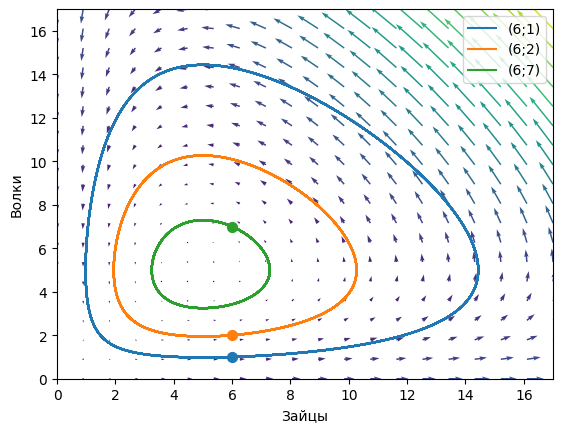

In [3]:
for i in [1,2,7]:
    x0=np.array((6, i))   
    t, x = rk2(f, t0=np.array((0,0)), x0=x0, b=10)
    plt.plot(np.stack(x, axis=1)[0], np.stack(x, axis=1)[1],label=f"({x0[0]};{x0[1]})")
    plt.scatter(x0[0], x0[1], s=50)
isocline_plot(f)

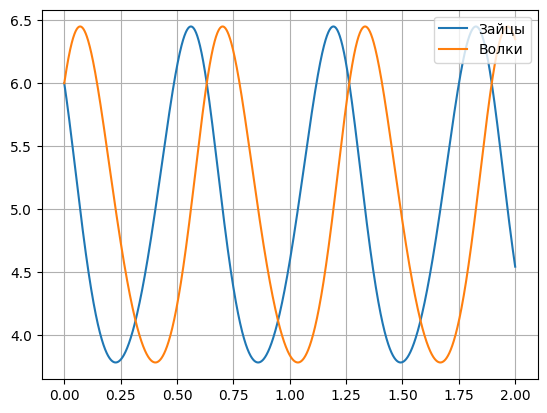

In [4]:
t, x = rk2(f, t0=np.array((0,0)), x0=np.array((6,6)), b=2)
plt.plot(np.stack(t, axis=1)[0], np.stack(x, axis=1)[0], label="Зайцы")
plt.plot(np.stack(t, axis=1)[0], np.stack(x, axis=1)[1], label="Волки")
plt.legend(loc='upper right')
plt.grid()
plt.show()

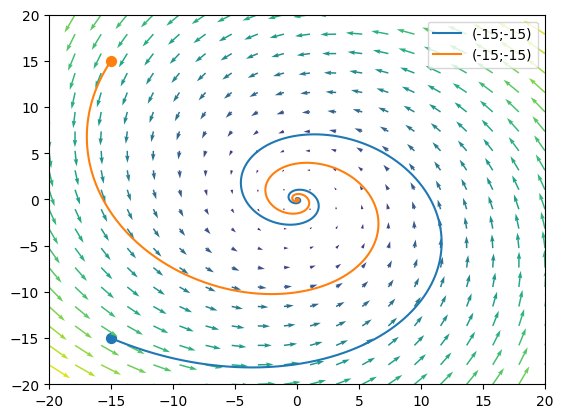

In [29]:
def f1(t, x):
    return np.array((-1*x[0]-5*x[1], 5*x[0]-x[1]))
    #return np.array((np.sin(x[0])+ np.sin(x[0]), np.cos(x[1])))

x0=np.array((-15, -15))   
x11=np.array((-15, +15))   

t1, x1 = rk2(f1, t0=np.array((0,0)), x0=x0, b=20)
t2, x2 = rk2(f1, t0=np.array((0,0)), x0=x11, b=20)

plt.plot(np.stack(x1, axis=1)[0], np.stack(x1, axis=1)[1], label=f"({x0[0]};{x0[1]})")
plt.plot(np.stack(x2, axis=1)[0], np.stack(x2, axis=1)[1], label=f"({x0[0]};{x0[1]})")

plt.scatter(x0[0], x0[1], s=50)
plt.scatter(x11[0], x11[1], s=50)

isocline_plot(f1, low_lim=-20, high_lim=20, draw_label=False)